<a href="https://colab.research.google.com/github/sistelca/Msgclientes/blob/master/valentin_task_event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Asignacion de nombres a las columnas (task events)
Segun documento: Google cluster-usage traces format shema 2013-11-17 external
Task events table
The task events table contains the following fields:
1. timestamp (timestamp)
2. missing info (miss_info)
3. job ID (job_ID)
4. task index - within the job (task_ind_job)
5. machine ID (machine_ID)
6. event type (event_type)
7. user name (user_name)
8. scheduling class (sched_class)
9. priority (priority)
10. resource request for CPU cores (res_req_CPU_cor)
11. resource request for RAM (res_req_RAM)
12. resource request for local disk space (re_req_disk)
13. different-machine constraint (diff_mach_constr)


In [2]:
import tarfile
import os

columns = ['timestamp', 'miss_info', 'job_ID', 'task_ind_job', 'machine_ID', 
           'event_type', 'user_name', 'sched_class', 'priority', 
           'res_req_CPU_cor', 'res_req_RAM', 'res_req_disk', 'diff_mach_constr']

 
carpeta = '/content/gdrive/My Drive/task_events/'

datos = pd.read_csv(carpeta + 'part-00000-of-00500.csv.gz', sep=',',
                    header=None, names=columns, compression='gzip')

# se elminan variables que no se van usar
datos = datos.drop(['miss_info', 'machine_ID', 'event_type', 'user_name', 
                    'sched_class', 'priority', 'diff_mach_constr'], axis=1)

archivos = sorted(os.listdir(carpeta))

print("Agregando \t Archivo \t Tamaño")
var = len(archivos)
i = 1
for archi in archivos:
    if archi != 'part-00000-of-00500.csv.gz':
        frames = pd.read_csv(carpeta+archi, sep=',',
                    header=None, names=columns, compression='gzip')
        frames = frames.drop(['miss_info', 'machine_ID', 'event_type',
                              'user_name', 'sched_class', 'priority',
                              'diff_mach_constr'], axis=1)
        datos = pd.concat([datos, frames], ignore_index = True) 
        print("%d / %d \t %s \t %d" % (archivos.index(archi)+1, var, archi, datos.shape[0]))
        i +=1
     
    if i > 39: # este control es para evitar consumir toda la memoria 
      break    # que ofrece google

# se eliminan filas con datos faltantes
datos = datos[datos.timestamp != 0]
datos = datos[datos.res_req_CPU_cor != 0]
datos = datos[datos.res_req_RAM != 0]
print('listo', datos.shape)


Agregando 	 Archivo 	 Tamaño
2 / 500 	 part-00001-of-00500.csv.gz 	 527922
3 / 500 	 part-00002-of-00500.csv.gz 	 688564
4 / 500 	 part-00003-of-00500.csv.gz 	 803964
5 / 500 	 part-00004-of-00500.csv.gz 	 919519
6 / 500 	 part-00005-of-00500.csv.gz 	 1086990
7 / 500 	 part-00006-of-00500.csv.gz 	 1240991
8 / 500 	 part-00007-of-00500.csv.gz 	 1429340
9 / 500 	 part-00008-of-00500.csv.gz 	 1561991
10 / 500 	 part-00009-of-00500.csv.gz 	 1827856
11 / 500 	 part-00010-of-00500.csv.gz 	 2048560
12 / 500 	 part-00011-of-00500.csv.gz 	 2211842
13 / 500 	 part-00012-of-00500.csv.gz 	 2427998
14 / 500 	 part-00013-of-00500.csv.gz 	 2609335
15 / 500 	 part-00014-of-00500.csv.gz 	 2972910
16 / 500 	 part-00015-of-00500.csv.gz 	 3168741
17 / 500 	 part-00016-of-00500.csv.gz 	 3432153
18 / 500 	 part-00017-of-00500.csv.gz 	 3759570
19 / 500 	 part-00018-of-00500.csv.gz 	 4749995
20 / 500 	 part-00019-of-00500.csv.gz 	 7159614
21 / 500 	 part-00020-of-00500.csv.gz 	 9766805
22 / 500 	 part-00021-o

In [3]:
etiqueta_col = {'timestamp':'timestamp',
                'miss_info':'missing info',
                'job_ID':'job ID', 
                'task_ind_job':'task index - within the job', 
                'machine_ID':'machine ID', 
                'event_type':'event type', 
                'user_name':'user name', 
                'sched_class':'scheduling class', 
                'priority':'priority', 
                'res_req_CPU_cor':'resource request for CPU cores', 
                'res_req_RAM':'resource request for RAM', 
                'res_req_disk':'resource request for local disk space', 
                'diff_mach_constr':'different-machine constraint'}

count_vars = datos.count()
print('{:<2} {:<28} {:53}  {}'.format('','\033[1m'+'variable'+'\033[0m', 
                                '\033[1m'+'descripcion'+'\033[0m',
                                '\033[1m'+'count'+'\033[0m'))
# 15 = 23 - 8 (8 son los char agregados para negrilla y fin de negrilla)
# 45 = 53 - 8 (8 son los char agregados para negrilla y fin de negrilla)

i = 1
for k in count_vars.keys():
    print('{:2} {:<20} {:45}  {}'.format(i, k, etiqueta_col[k], count_vars[k]))
    i += 1

   variable             descripcion                                    count
 1 timestamp            timestamp                                      21042398
 2 job_ID               job ID                                         21042398
 3 task_ind_job         task index - within the job                    21042398
 4 res_req_CPU_cor      resource request for CPU cores                 21042398
 5 res_req_RAM          resource request for RAM                       21042398
 6 res_req_disk         resource request for local disk space          21042398


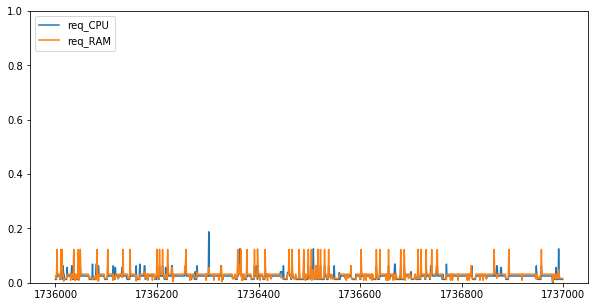

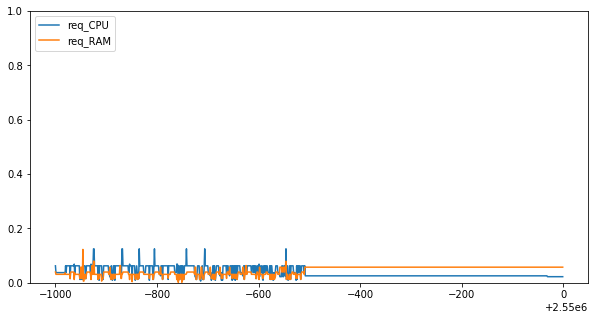

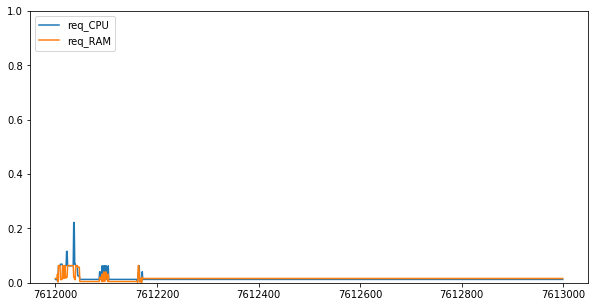

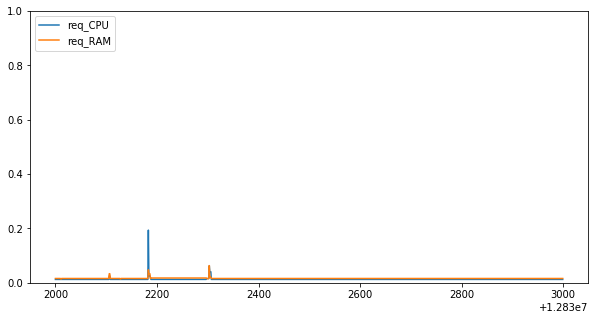

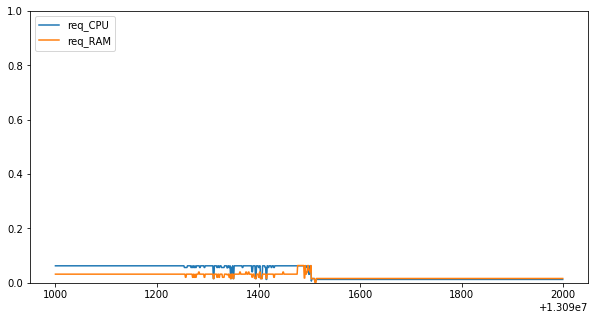

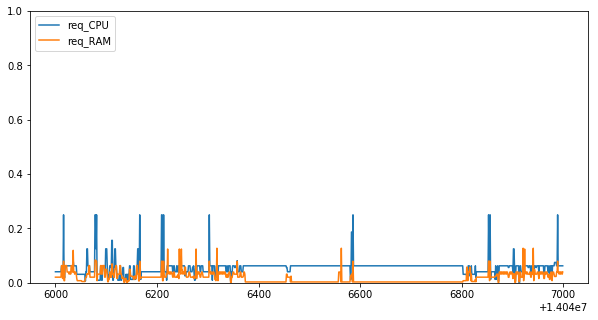

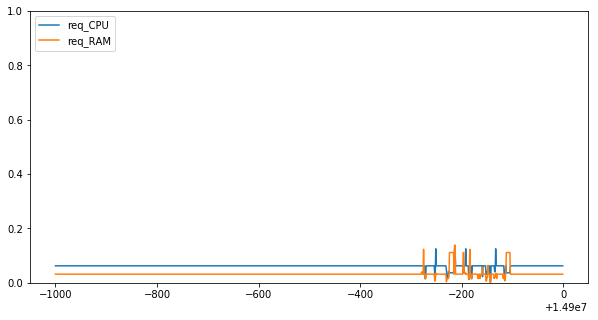

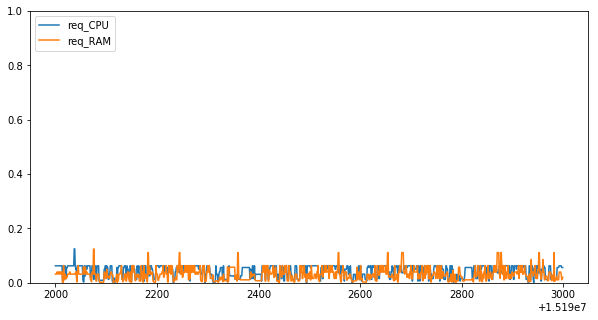

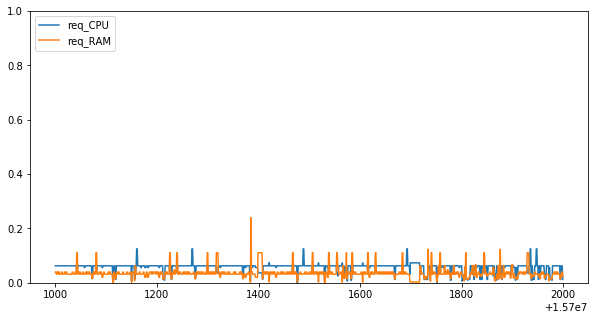

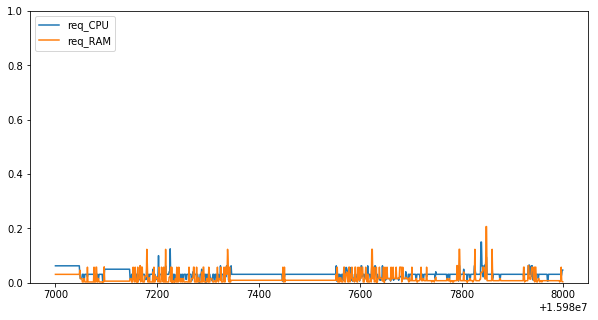

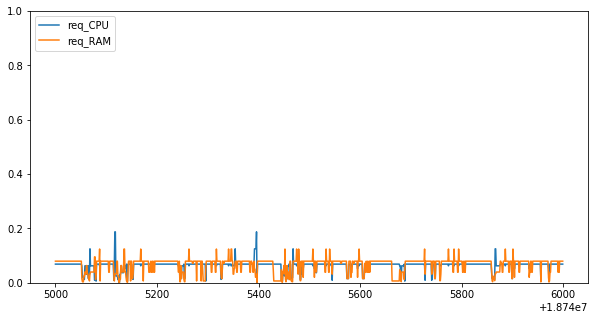

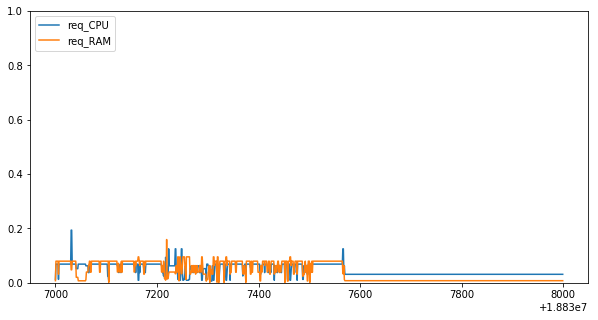

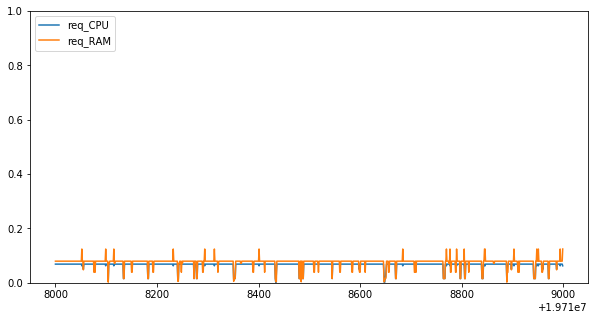

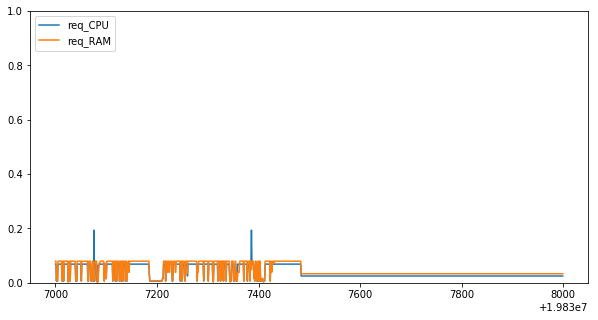

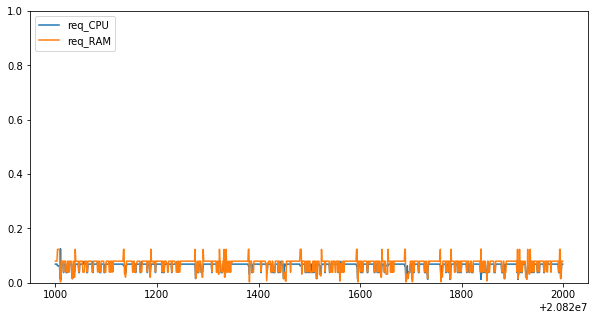

In [4]:
# tomando 1000 datos para prueba
import random
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

# haremos 15 graficas para direferentes secuencias de registros de esta tabla;
# cada secuencia tendra una longitud de 1000 registros, y seran seleccionadas
# al azar del conjunto de datos

def calc_intervalos(tot_reg, num_graficas = 15, cantidad_reg_x_interv = 1000):
  

  num_secuencias = tot_reg//cantidad_reg_x_interv

  poblacion = [i*cantidad_reg_x_interv for i in range(num_secuencias-1)]

  muestra =  sorted(random.sample(poblacion, num_graficas))

  intervalos = [[muestra[i], muestra[i]+cantidad_reg_x_interv]
                for i in range(len(muestra))]
  
  return intervalos
  
intervalos = calc_intervalos(datos.shape[0])

for li, ls in intervalos:
  prueba = datos[li:ls]

  y1 = prueba['res_req_CPU_cor']

  y2 = prueba['res_req_RAM']

  # eje x
  t = np.arange(li, ls)
  
  plt.ylim(0,1)
  
  # graficas
  plt.plot(t, y1,  t, y2)

  plt.legend(('req_CPU', 'req_RAM'), loc='upper left')

  plt.show()

In [5]:
intervalos_muestrales = []
for li, ls in intervalos:
  print('\033[1m')
  print('Intervalo: {:<10} \t  {}'.format(li, ls))
  print('\033[0m')
  
  prueba = datos[li:ls]

  print(prueba[['res_req_CPU_cor', 'res_req_RAM']].describe())
  
  # se almacenan valores de estimaciones de interes para la investigacion
  estimadores = prueba[['res_req_CPU_cor', 'res_req_RAM']].describe()
  dic_estimadores = {'res_req_CPU_cor':{'mean':estimadores.res_req_CPU_cor['mean'],
                                       'std':estimadores.res_req_CPU_cor['std']},
                    'res_req_RAM':{'mean':estimadores.res_req_RAM['mean'],
                                   'std':estimadores.res_req_RAM['std']}}
  intervalos_muestrales.append(dic_estimadores)
  
  



Intervalo: 1736000    	  1737000

       res_req_CPU_cor  res_req_RAM
count      1000.000000  1000.000000
mean          0.025905     0.030720
std           0.015335     0.022029
min           0.000625     0.003883
25%           0.015620     0.015900
50%           0.024990     0.031800
75%           0.024990     0.031800
max           0.187500     0.124300

Intervalo: 2549000    	  2550000

       res_req_CPU_cor  res_req_RAM
count      1000.000000  1000.000000
mean          0.037253     0.045162
std           0.019437     0.015166
min           0.006248     0.001554
25%           0.025630     0.031190
50%           0.025630     0.057500
75%           0.062500     0.057500
max           0.125000     0.122800

Intervalo: 7612000    	  7613000

       res_req_CPU_cor  res_req_RAM
count      1000.000000  1000.000000
mean          0.015340     0.016282
std           0.014506     0.009110
min           0.006248     0.000777
25%           0.012500     0.015900
50%           0.012500     0.01

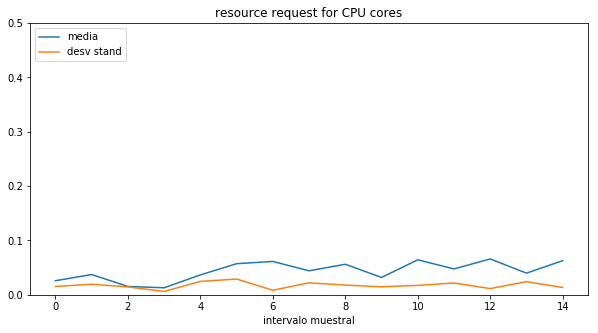

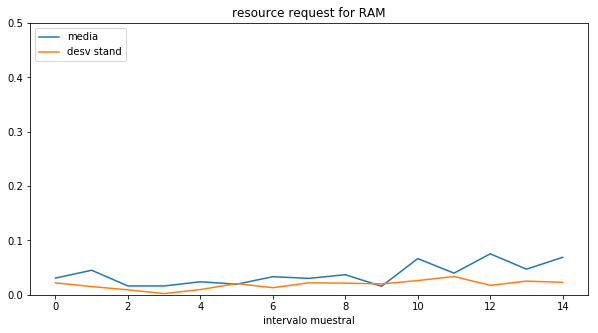

In [6]:

for variable in ['res_req_CPU_cor', 'res_req_RAM']:
  
  y1 = [y[variable]['mean'] for y in intervalos_muestrales]

  y2 = [y[variable]['std'] for y in intervalos_muestrales]

  # eje x
  t = np.arange(0, len(intervalos_muestrales))
  
  plt.ylim(0,.5) # se asigna .5 en vez de 1 para ampliar mejor la visualizacion
  
  # graficas
  plt.plot(t, y1,  t, y2)

  plt.legend(('media', 'desv stand'), loc='upper left')
  plt.title(etiqueta_col[variable])
  plt.xlabel('intervalo muestral')
  plt.show()

Como se puede observar en las graficas anteriores, ambas variables (res_req_CPU_cor y res_req_RAM), se comportan como **series de tiempo estacionarias**, en las muestras de secuencias tomadas del dataset, lo que permite analizarlas con las herramientas de analisis de series de tiempo estacionarias.

Ahora en base a estos resultados, se enfoca el interes en algo mas critico como resulta ser el tiempo que transcurre entre cada solicitud de recursos, y se repetira el mismo analisis anterior para esta.

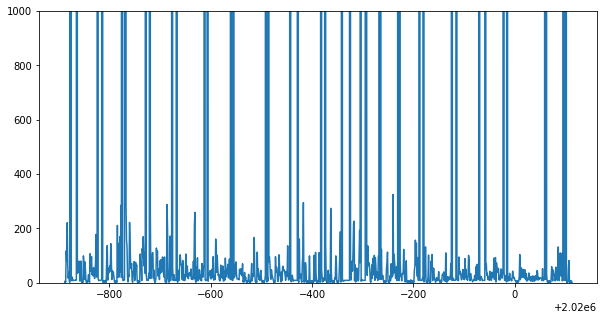

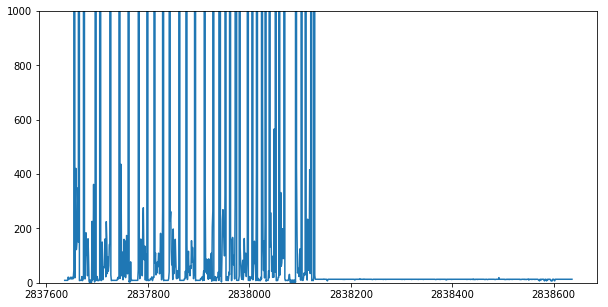

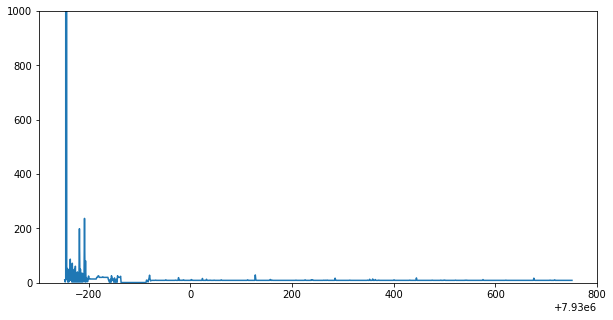

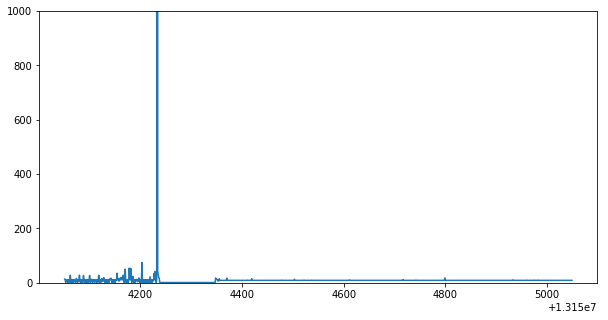

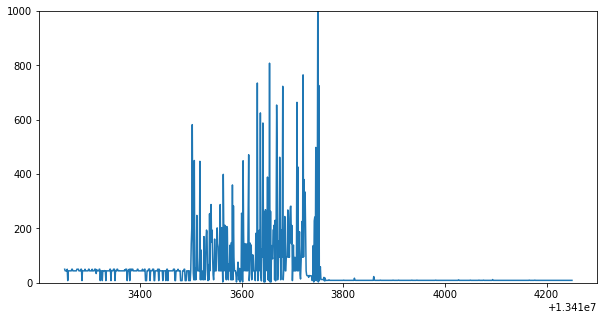

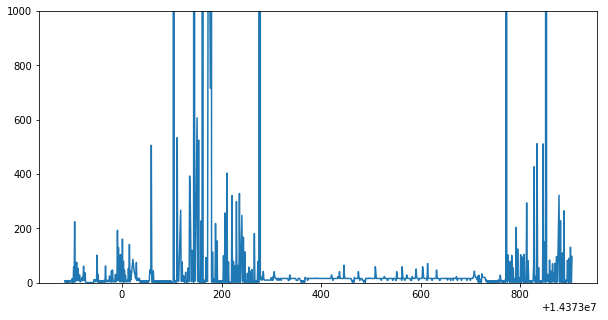

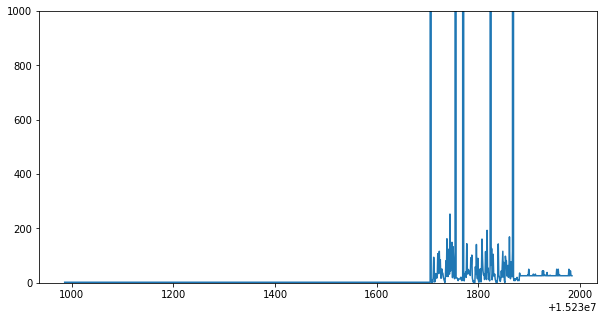

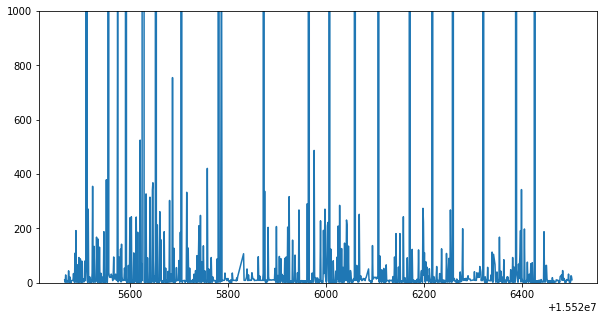

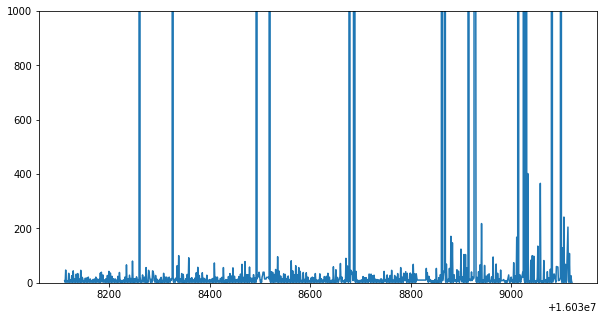

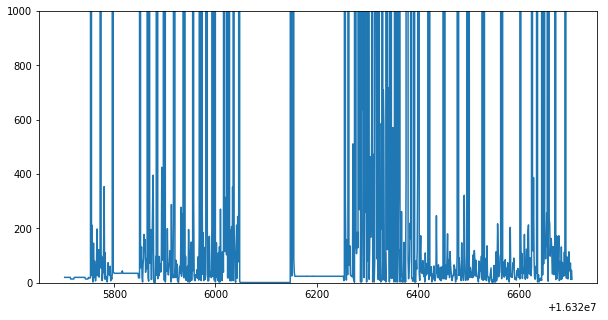

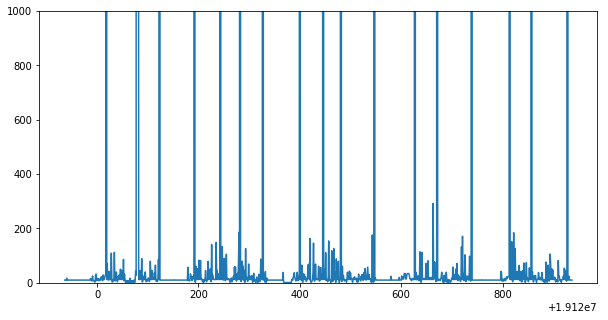

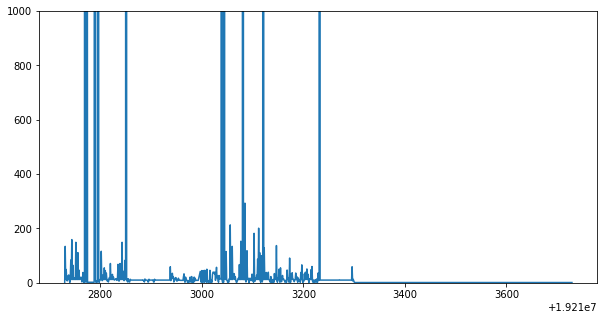

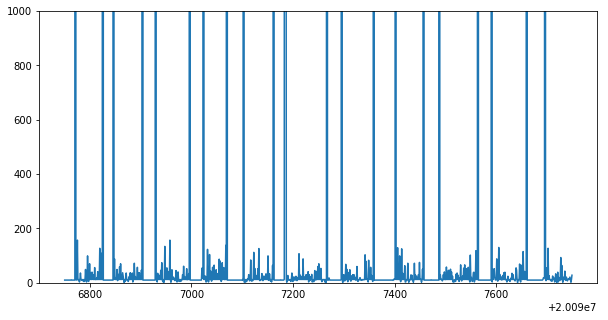

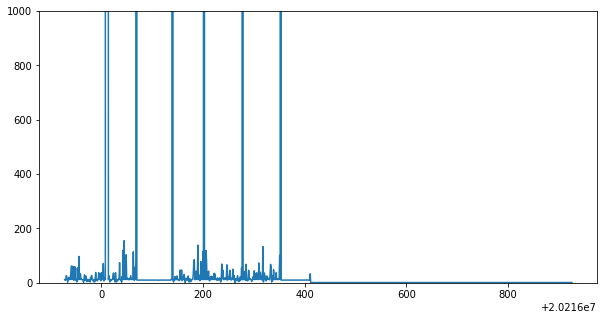

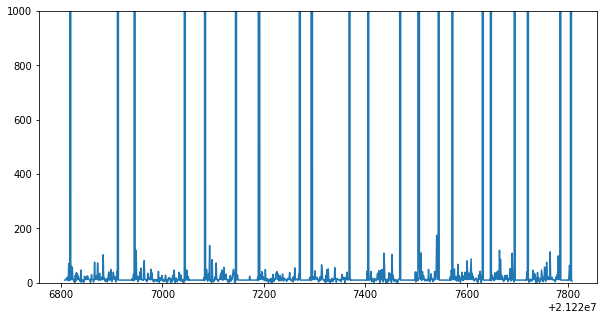

In [11]:
for li, ls in intervalos:
  prueba = datos[li:ls]

  tiempo_entre_solic = prueba[['timestamp']].diff()


  t = tiempo_entre_solic.index
  
  y = tiempo_entre_solic.timestamp
  
  plt.ylim(0,.5) # se asigna .5 en vez de 1 para ampliar mejor la visualizacion
  
  # eje x
  #t = np.arange(li, ls)
  #print(t)
  plt.ylim(0,1000)
  
  # graficas
  plt.plot(t, y)

  plt.show()

El las graficas anteriores, se puede observar que los picos (valores altos) en el tiempo transcurrido entre una solicitud y otra correponden a periodos de descanso

In [12]:
intervalos_muestrales = []
for li, ls in intervalos:
  print('\033[1m')
  print('Intervalo: {:<10} \t  {}'.format(li, ls))
  print('\033[0m')
  
  prueba = datos[li:ls]
  
  prueba = prueba[['timestamp']].diff()

  print(prueba[['timestamp']].describe())
  
  # se almacenan valores de estimaciones de interes para la investigacion
  estimadores = prueba[['timestamp']].describe()
  dic_estimadores = {'timestamp':{'mean':estimadores.timestamp['mean'],
                                       'std':estimadores.timestamp['std']}}
  intervalos_muestrales.append(dic_estimadores)


Intervalo: 1736000    	  1737000

          timestamp
count  9.990000e+02
mean   1.845159e+04
std    1.241480e+05
min    1.000000e+00
25%    8.000000e+00
50%    1.900000e+01
75%    5.200000e+01
max    1.257577e+06

Intervalo: 2549000    	  2550000

          timestamp
count  9.990000e+02
mean   1.747050e+04
std    1.190048e+05
min    1.000000e+00
25%    1.300000e+01
50%    1.300000e+01
75%    2.300000e+01
max    1.258815e+06

Intervalo: 7612000    	  7613000

          timestamp
count  9.990000e+02
mean   1.211080e+03
std    3.795603e+04
min    1.000000e+00
25%    9.000000e+00
50%    9.000000e+00
75%    9.000000e+00
max    1.199685e+06

Intervalo: 12832000   	  12833000

          timestamp
count  9.990000e+02
mean   1.501031e+03
std    4.717326e+04
min    1.000000e+00
25%    9.000000e+00
50%    9.000000e+00
75%    9.000000e+00
max    1.491012e+06

Intervalo: 13091000   	  13092000

         timestamp
count   999.000000
mean     49.610611
std      99.774523
min       3.000000
25%     

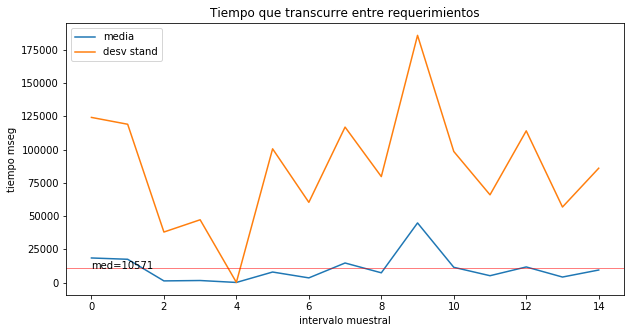

In [24]:
y1 = [y['timestamp']['mean'] for y in intervalos_muestrales]

y2 = [y['timestamp']['std'] for y in intervalos_muestrales]

prom_y1 = sum(y1)/len(y1)

# eje x
t = np.arange(0, len(intervalos_muestrales))
  
#plt.ylim(0,.5) # se asigna .5 en vez de 1 para ampliar mejor la visualizacion
  
# graficas
plt.plot(t, y1,  t, y2)

plt.legend(('media', 'desv stand'), loc='upper left')
plt.title('Tiempo que transcurre entre requerimientos')
plt.axhline(y=prom_y1, xmin=0, xmax=len(intervalos_muestrales), color ='r', linewidth=.5)
plt.annotate('med='+str(int(prom_y1)),xy=(0,prom_y1+0.5))
plt.xlabel('intervalo muestral')
plt.ylabel('tiempo mseg')
plt.show()

Como se puede observar en el anterior grafico, para la variable **"tiempo transcurrido entre solicitud de recursos"**,  tiene un comportamiento estacionario en la media, aunque la desviacion estandar fluctua mas devido a los picos (periodos de descanso) observados en graficos anteriores. La linea roja representa la media estimada general de los valores de tiempo transcurrido entre requerimientos en esta muestra, en microsegundos (1 seg = 1.000.000 mseg), expresa la densidad de requerimientos para los periodos de tiempo muestreados en el dataset

In [0]:
prueba.head(20)

,timestamp
19974578,NaN
19974579,41.0
19974580,12.0
19974581,6.0
19974582,6.0
19974583,12.0
19974584,8.0
19974585,12.0
19974586,5.0
19974587,12.0
